In [10]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy import signal

In [2]:
canvas = np.zeros((32, 32))

In [3]:
for i in range(32):
    for j in range(32):
        if i == 10 and j >= 5 and j <= 26:
            canvas[i, j] = 1
        if i - j == 5 and i >= 10 and i <= 21:
            canvas[i, j] = 1
        if i + j == 37 and i >= 10 and i <= 21:
            canvas[i, j] = 1

In [4]:
theta = np.array(
        [[0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]],
    dtype=np.float64)

In [5]:
conv_canvas = signal.correlate2d(canvas, theta)

In [6]:
def init():
    ax[0].add_patch(theta_patch)
    ax[1].add_patch(output_cell)
    return (theta_patch, output_cell)
    
def animate(i):
    theta_patch.set_xy(i // 30, i % 30)
    output_cell.set_xy(i // 30 + 1, i % 30 + 1)
    return (theta_patch, output_cell)

In [11]:
F, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(canvas, cmap='Greys', clim=(0, 3))
ax[1].imshow(conv_canvas, cmap='Greys', clim=(0, 3))
theta_patch = plt.Rectangle((0, 0), 3, 3)
output_cell = plt.Rectangle((1, 1), 1, 1)

anim = animation.FuncAnimation(F, animate, init_func=init, frames=900, blit=True)

plt.show()

<IPython.core.display.Javascript object>

In [123]:
rot_canvas = np.rot90(canvas, axes=(0, 1), k = 1)
rot_conv_canvas = signal.correlate2d(rot_canvas, theta)

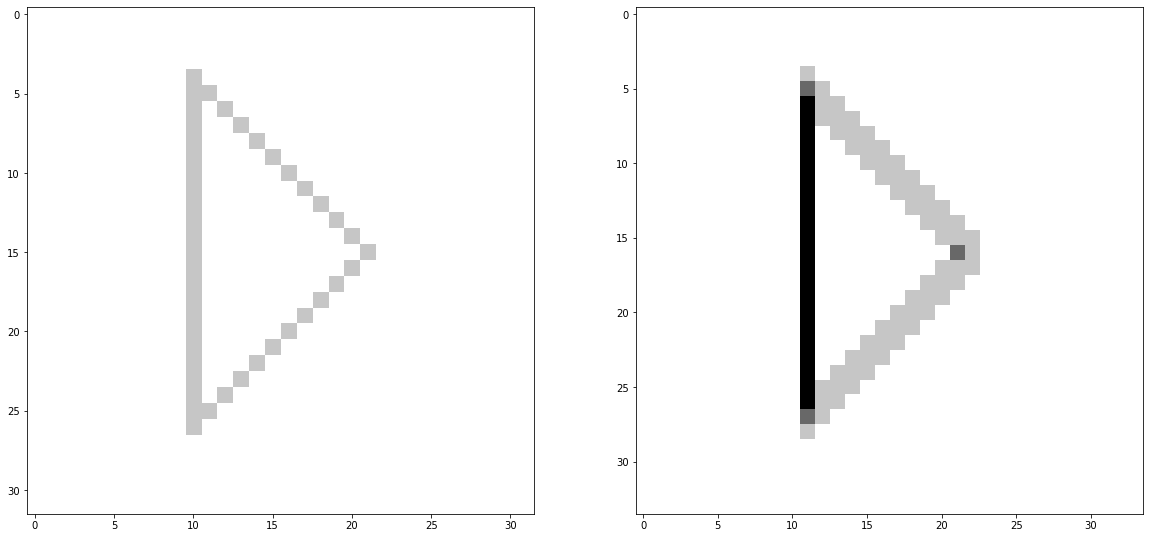

In [124]:
F, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(rot_canvas, cmap='Greys', clim=(0, 3))
ax[1].imshow(rot_conv_canvas, cmap='Greys', clim=(0, 3))